In [1]:
from modeling.learner import get_preds
from modeling import ASTPretrained
from modeling.dataset import get_loader
from modeling.utils import parse_config, CLASSES
from modeling.models import average_model_weights
from modeling.metrics import *

import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
%matplotlib inline

In [3]:
CONFIG_PATH = "../configs/config.yaml"
config = parse_config(CONFIG_PATH)

In [4]:
valid_dl = get_loader(config, subset="valid")
test_dl = get_loader(config, subset="test")

In [5]:
base_model = ASTPretrained(n_classes=11, download_weights=False)

In [30]:
def evaluate(weight_list: list, base_model: nn.Module):
    # Create empty lists to store the accuracy and F1 score for each weight on the validation and test sets
    val_mAPs, val_accs, val_f1s, test_mAPs, test_accs, test_f1s = [], [], [], [], [], []

    # Loop through each weight and calculate accuracy and F1 score on the validation and test sets
    weights = [f"../weights/{weight}.pth" for weight in weight_list]
    
    for w in weights:
        # Make predictions on the validation set using the current weight
        base_model.load_state_dict(torch.load(w))
        preds, targets = get_preds(valid_dl, base_model, device="cuda")

        # Calculate accuracy and F1 score on the validation set
        thresholds = optimize_f1_score(preds, targets)
        print(thresholds)
        
        val_mAP = mean_average_precision(preds, targets)
        val_acc = hamming_score(preds, targets, thresholds)
        val_f1 = mean_f1_score(preds, targets, thresholds)

        # Make predictions on the test set using the current weight
        preds, targets = get_preds(test_dl, base_model, device="cuda")

        # Calculate accuracy and F1 score on the test set
        test_mAP = mean_average_precision(preds, targets)
        test_acc = hamming_score(preds, targets, thresholds)
        test_f1 = mean_f1_score(preds, targets, thresholds)

        # Append the results to the corresponding lists
        val_mAPs.append(val_mAP)
        val_accs.append(val_acc)
        val_f1s.append(val_f1)
        test_mAPs.append(test_mAP)
        test_accs.append(test_acc)
        test_f1s.append(test_f1)

    # Create a pandas dataframe to display the results
    df = pd.DataFrame({
        'Weight': weight_list,
        'Val Acc': val_accs,
        'Val mAP': val_mAPs,
        'Val F1': val_f1s,
        'Test Acc': test_accs,
        'Test mAP': test_mAPs,
        'Test F1': test_f1s
    })

    # Display the dataframe
    return df

In [7]:
weight_list = ["bpm_sync_bce", "pitch_sync_bce", "no_sync2_bce", "bpm_sync_focal", "pitch_sync_focal", "no_sync2_focal"]

In [8]:
results = evaluate(weight_list, base_model)
results

  0%|          | 0/187 [00:00<?, ?it/s]

/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)
/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)
/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)
/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)
/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


  0%|          | 0/174 [00:00<?, ?it/s]

,Weight,Val Acc,Val mAP,Val F1,Test Acc,Test mAP,Test F1
0,bpm_sync_bce,0.927529,0.865198,0.765982,0.909157,0.826800,0.705824
1,pitch_sync_bce,0.925636,0.861343,0.760680,0.907122,0.820174,0.701609
2,no_sync2_bce,0.927468,0.871443,0.758045,0.909025,0.834264,0.690806
3,bpm_sync_focal,0.921363,0.852915,0.739115,0.905218,0.823464,0.698195
4,pitch_sync_focal,0.922523,0.860144,0.741792,0.907384,0.821003,0.694743
5,no_sync2_focal,0.926613,0.867765,0.758636,0.909682,0.833635,0.695754


In [9]:
weights = [f"../weights/{weight}.pth" for weight in weight_list[:3]]

average_weight = average_model_weights(weights)
torch.save(average_weight, "../weights/averaged_weights_bce.pth")

In [31]:
results = evaluate(["averaged_weights_bce"], base_model)
results

  0%|          | 0/187 [00:00<?, ?it/s]

/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


[0.69686234 0.47541589 0.33716482 0.5102933  0.28994969 0.57248038
 0.54958439 0.43131939 0.27124193 0.56657934 0.14958709]


  0%|          | 0/174 [00:00<?, ?it/s]

,Weight,Val Acc,Val mAP,Val F1,Test Acc,Test mAP,Test F1
0,averaged_weights_bce,0.927957,0.870258,0.766727,0.909616,0.830385,0.704143


In [33]:
best_weight = torch.load("../weights/averaged_weights_bce.pth")
base_model.load_state_dict(best_weight)

<All keys matched successfully>

In [16]:
preds, targets = get_preds(valid_dl, base_model, "cuda")
thresholds = optimize_f1_score(preds, targets)

  0%|          | 0/187 [00:00<?, ?it/s]

/nfs/home/8548f215c44990b1/lumen-irmas/modeling/metrics.py:144: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


In [40]:
CLASSES

('cla', 'cel', 'flu', 'tru', 'org', 'gac', 'vio', 'pia', 'gel', 'sax', 'voi')

In [34]:
thresholds

array([0.69686234, 0.47541589, 0.33716482, 0.5102933 , 0.28994969,
       0.57248038, 0.54958439, 0.43131939, 0.27124193, 0.56657934,
       0.14958709])

In [52]:
np.save("../weights/acc_model_thresh", thresholds)
thresholds = np.load("../weights/acc_model_thresh.npy", allow_pickle=True)

In [35]:
preds, targets = get_preds(test_dl, base_model, "cuda")
f1_score = mean_f1_score(preds, targets, thresholds)
f1_scores_per_inst = per_instr_f1_score(preds, targets, thresholds)

  0%|          | 0/174 [00:00<?, ?it/s]

/tmp/ipykernel_53426/1438799796.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


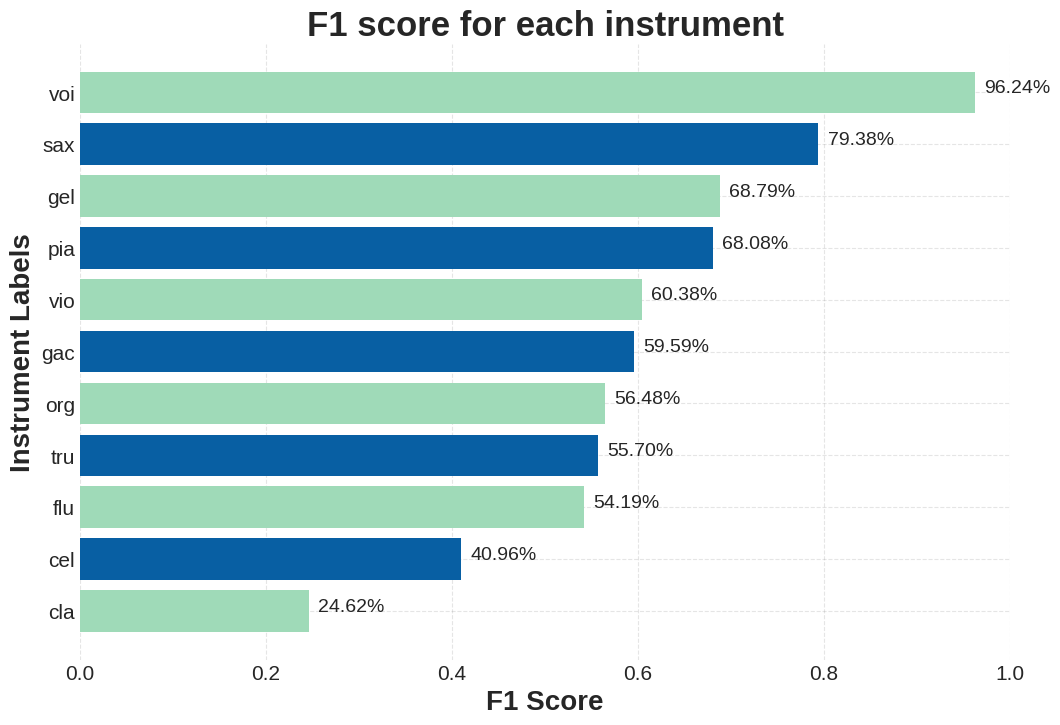

In [45]:
# Sorting the accuracy and classes lists in descending order of accuracy
f1_scores_per_inst, CLASSES = zip(*sorted(zip(f1_scores_per_inst, CLASSES), reverse=False))

# Setting the background color and style
plt.style.use('seaborn-dark')
plt.rcParams['axes.facecolor'] = 'white'

# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Setting the font size and weight of the title
ax.set_title('F1 score for each instrument', fontsize=25, fontweight='bold')

# Creating the horizontal bar plot with a gradient color
color = plt.cm.GnBu([0.4, 0.9])
ax.barh(CLASSES, f1_scores_per_inst, color=color)

# Customizing the grid lines and axis labels
ax.grid(color='grey', linestyle='--', alpha=0.2)
ax.set_xlabel('F1 Score', fontsize=20, fontweight='bold')
ax.set_ylabel('Instrument Labels', fontsize=20, fontweight='bold')

# Customizing the tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

# Adding the accuracy percentage text beside each bar
for i, v in enumerate(f1_scores_per_inst):
    ax.text(v+0.01, i, f"{v:.2%}", fontsize=14)

# Adjusting the plot limits to add some space at the left and right
plt.xlim(0.0, 1.0)

# Showing the plot
plt.show()